In [17]:
import numpy as np

import kingdon as kd

from kingdon import Algebra
import matplotlib.pyplot as plt


algebra = Algebra(3, 0, 1)
locals().update(algebra.blades)

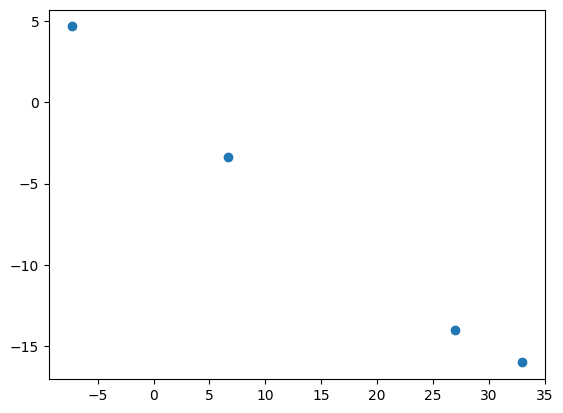

In [18]:
d = np.array([
    [50, 1, .01],
    [40,-1, -.03],
    [10, 0, .02],
    [-10,2, .005]
])

centered_d = d - np.mean(d, axis=-1, keepdims=True)
plt.scatter(centered_d[:, 0], centered_d[:, 1])

In [12]:
covariance = centered_d.T @ centered_d
covariance

array([[1916.47793611, -962.38873056, -954.08920556],
       [-962.38873056,  484.74460278,  477.64412778],
       [-954.08920556,  477.64412778,  476.44507778]])

In [13]:
lD, eigD = np.linalg.eig(covariance.T)
eigD = eigD.T
LD = np.eye(3) * lD

display(eigD)
display(LD)


array([[ 0.81649402, -0.41001678, -0.40647725],
       [-0.57735027, -0.57735027, -0.57735027],
       [-0.00204355, -0.70608279,  0.70812634]])

array([[ 2.87473489e+03, -0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -5.74582260e-14,  0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00,  2.93272313e+00]])

In [20]:
correct_principle_component = (eigD @ LD)[0]

array([ 2.34720386e+03,  2.35588367e-14, -1.19208522e+00])

In [23]:
list(algebra.blades.keys())

['e',
 'e0',
 'e1',
 'e2',
 'e3',
 'e01',
 'e02',
 'e03',
 'e12',
 'e13',
 'e23',
 'e012',
 'e013',
 'e023',
 'e123',
 'e0123']

In [36]:
centered_d[:, 0] * e1

TypeError: 'int' object is not subscriptable

In [51]:
line_basis = e12 + e13 + e23


for_kingdon = np.concatenate([centered_d.T, np.ones([1, centered_d.shape[0]])], axis=0)

points = algebra.trivector(for_kingdon)
# points = centered_d[:, 0] * e012 + centered_d[:, 1] * e013 + centered_d[:, 2] * e023 + e123

origin = algebra.trivector(np.array([[0,0,0,1]]).T)


In [53]:
as_lines = points & origin

In [62]:
as_lines[1]

27.0 𝐞₁₂ + -14.0 𝐞₁₃ + -13.0 𝐞₂₃

In [64]:
planes = algebra.vector(for_kingdon)

In [91]:
(planes * points)[0]

-5.77e+02 𝐞₀₁ + 5.11e+02 𝐞₀₂ + -5.45e+02 𝐞₀₃ + 1.0 𝐞₁₂ + 17.0 𝐞₁₃ + -16.0 𝐞₂₃

In [79]:
display(points[0])
display(planes[0])

33.0 𝐞₀₁₂ + -16.0 𝐞₀₁₃ + -17.0 𝐞₀₂₃ + 1.0 𝐞₁₂₃

33.0 𝐞₀ + -16.0 𝐞₁ + -17.0 𝐞₂ + 1.0 𝐞₃

In [168]:
from sympy import symbols, Function, Expr, Add, Integer, sympify, simplify

class hyperreal(Function):

    @classmethod
    def eval(cls, exponent):

        if exponent == 0:
            return 1
        
        return None

    def __mul__(self, other):
        print("asdf")
        return other

    def _latex(self, printer):

        s = printer._print(symbols('\\epsilon') if self.args[0] < 0 else symbols('H'))

        exponent = printer._print(np.abs(self.args[0]))

        return f'{s} ^ {exponent}'
    
    
simplify(123.45 * hyperreal(3) * hyperreal(2))

123.45*hyperreal(2)*hyperreal(3)

In [175]:
a = symbols('a')

a**2 * a**4

a**6